In [86]:
import kagglehub
import os

path = kagglehub.dataset_download("andrewmvd/animal-faces")
full_path = os.path.join(path, "afhq","train")
print("Dataset path:", full_path)

Dataset path: /Users/keerthanamanoharan/.cache/kagglehub/datasets/andrewmvd/animal-faces/versions/1/afhq/train


Found 14630 files belonging to 3 classes.
Using 2926 files for validation.
class_names: ['cat', 'dog', 'wild']
Found 14630 files belonging to 3 classes.
Using 2926 files for validation.


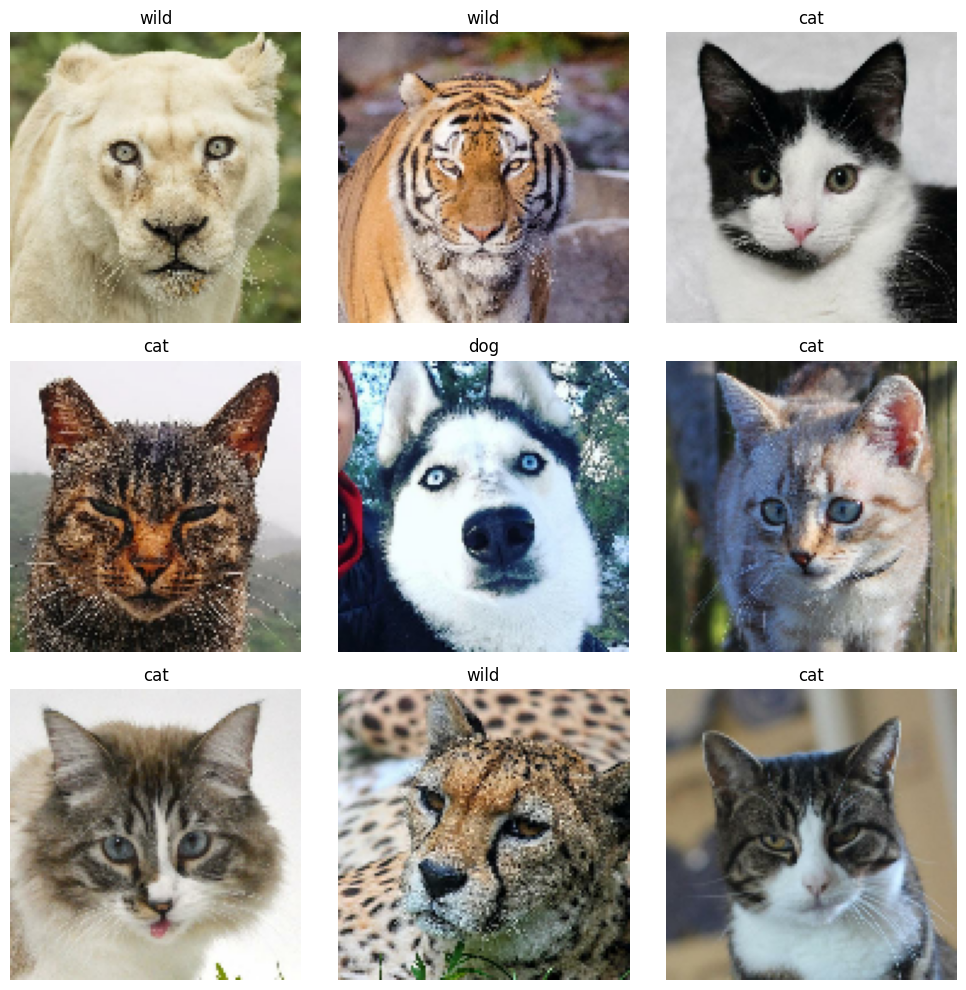

In [87]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt


# Dataset path 
data_train_dir = os.path.expanduser(full_path)
# Load dataset from directory
train_ds = tf.keras.utils.image_dataset_from_directory(
  data_train_dir,
  validation_split = 0.2,
  subset= "validation",
  seed=123,
  image_size=(120, 120),
  batch_size=32
)

# Class Name
class_names = train_ds.class_names
num_classes = len(class_names)
print('class_names:' ,class_names)


test_ds = tf.keras.utils.image_dataset_from_directory(
    data_train_dir,
    validation_split=0.2,
    subset="validation",
    seed=123,
    image_size=(120, 120),
    batch_size=32
)


#display a batch of image 
for images, labels in train_ds.take(1):

 plt.figure(figsize=(10, 10))
 for i in range(9):


    plt.subplot(3, 3, i+1 )
    plt.imshow(images[i].numpy().astype('uint8'))
    plt.title(class_names[labels[i]])
    plt.axis('off')
plt.tight_layout()
plt.show()

In [88]:
# Normalize pixel values to [0, 1]
normalization_layer = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (normalization_layer(x), y))
test_ds = test_ds.map(lambda x, y: (normalization_layer(x), y))


In [84]:
#Build and Train the CNN Model
num_classes = len(train_ds.class_names)  # e.g., 3 for cat, dog, panda

model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, 3, activation='relu', input_shape=(120 , 120, 3)),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(64, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Conv2D(128, 3, activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(num_classes)
])

#compile model
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['accuracy']
)

history = model.fit(train_ds, validation_data=test_ds, epochs=10)


Epoch 1/10


/Users/keerthanamanoharan/Desktop/FromClass/Repos/identifying-animals-exercise-2/venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.5299 - loss: 21.7935 - val_accuracy: 0.8606 - val_loss: 0.3650
Epoch 2/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.8499 - loss: 0.3960 - val_accuracy: 0.9040 - val_loss: 0.2437
Epoch 3/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.9144 - loss: 0.2399 - val_accuracy: 0.9316 - val_loss: 0.1794
Epoch 4/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.9150 - loss: 0.2329 - val_accuracy: 0.9607 - val_loss: 0.1200
Epoch 5/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.9559 - loss: 0.1155 - val_accuracy: 0.9668 - val_loss: 0.1009
Epoch 6/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 126ms/step - accuracy: 0.9438 - loss: 0.1496 - val_accuracy: 0.9621 - val_loss: 0.1152
Epoch 7/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 128ms/step - accuracy: 0.9643 - loss: 0.0982 - val_accuracy: 0.9802 - val_loss: 0.0592
Epoch 8/10
92/92 ━━━━━━━━━━━━━━━━━━━━ 12s 127ms/step - accuracy: 0.9762 - loss: 0.0674 - val_accuracy: 0.98

In [85]:
#Testing the model
loss, accuracy = model.evaluate(test_ds)
print(f"Test Accuracy: {accuracy*100:.2f}%")


92/92 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9998 - loss: 0.0045
Test Accuracy: 99.97%


In [ ]:
#Analyze and Reflect
from sklearn.metrics import classification_report
import numpy as np

# True labels
y_true = np.concatenate([y.numpy() for x, y in test_ds])
# Predictions
y_pred_logits = model.predict(test_ds)
y_pred = np.argmax(y_pred_logits, axis=1)

# Print report  
print(classification_report(y_true, y_pred, target_names=class_names))


366/366 ━━━━━━━━━━━━━━━━━━━━ 12s 31ms/step
              precision    recall  f1-score   support

         cat       0.36      0.30      0.32      4108
         dog       0.14      0.00      0.00      3803
        wild       0.33      0.71      0.45      3793

    accuracy                           0.34     11704
   macro avg       0.28      0.34      0.26     11704
weighted avg       0.28      0.34      0.26     11704



Dataset: Animal Faces from Kaggle (cats, dogs, pandas)

Model: CNN trained from scratch using Keras

Accuracy: Reported on validation set + detailed classification metrics

Improvements:

Add data augmentation

Use transfer learning with MobileNet or ResNet

Hyperparameter tuning (more epochs, different optimizers, etc.)

Would you like me to show this using transfer learning (for higher accuracy), or do you want to visualize predictions with images?